<a href="https://colab.research.google.com/github/NBK-code/IMDB_Movie_Rating_Prediction/blob/main/IMDB_mrp_Data_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv('/content/sample_data/movie_metadata.csv')

In [21]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [22]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')



We have the following variables:

Categorical variables: 'color', 'director_name', 'actor_2_name','genres', 'actor_1_name', 'movie_title', 'actor_3_name', 'plot_keywords', 'movie_imdb_link', 'language', 'country', 'content_rating'.

Numerical variables: 'num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross', 'num_voted_users', 'cast_total_facebook_likes','facenumber_in_poster', 'num_user_for_reviews', 'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio', 'movie_facebook_likes'

In [23]:
df.dropna(subset = ['movie_title','director_name','actor_1_name','actor_2_name','actor_3_name',
                    'country','language','content_rating','genres','color','plot_keywords'], inplace = True)

In [24]:
df["aspect_ratio"].fillna(float(df["aspect_ratio"].mode()), inplace=True)

In [25]:
df["budget"].fillna(df["budget"].median(), inplace=True)

In [26]:
df["num_user_for_reviews"].fillna(df["num_user_for_reviews"].median(), inplace=True)

In [27]:
df["num_critic_for_reviews"].fillna(df["num_critic_for_reviews"].median(), inplace=True)

In [28]:
df["gross"].fillna(df["gross"].median(), inplace=True)

In [29]:
df["facenumber_in_poster"].fillna(df["facenumber_in_poster"].median(), inplace=True)

In [30]:
df["duration"].fillna(df["duration"].median(), inplace=True)

In [31]:
df.isna().sum()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

### Year-wise distribution of movies

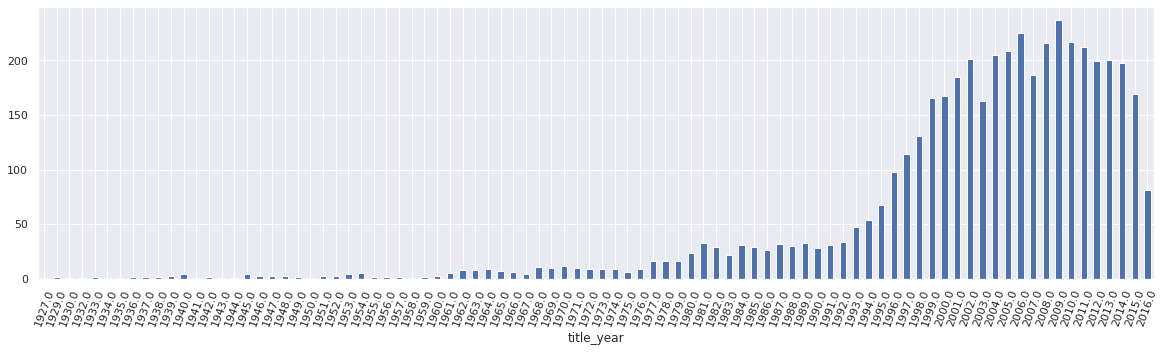

In [58]:
df.groupby('title_year').size().plot.bar(x='year', y='movie_count', rot=70, figsize = (20,5))

###Log Budget vs IMDB Score

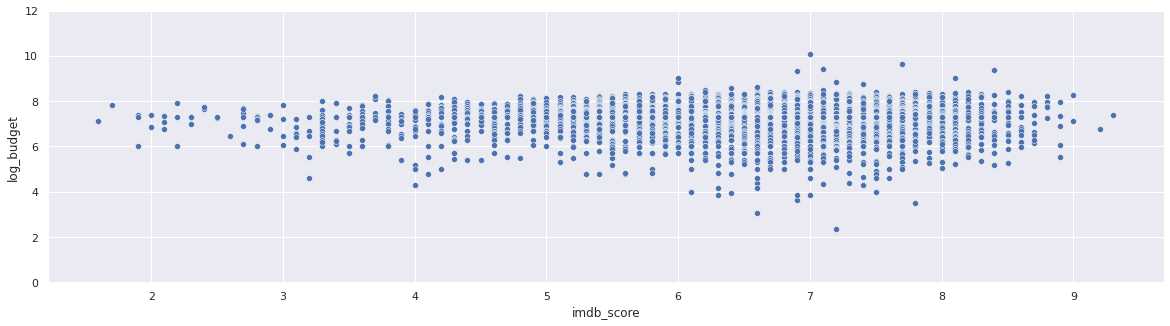

In [62]:
df['log_budget'] = np.log10(df['budget'])

sns.set(rc={"figure.figsize":(20, 5)})
sns.scatterplot(data=df, x="imdb_score", y="log_budget")
plt.ylim(0, 12)
plt.show()

###Log Gross vs IMDB Score

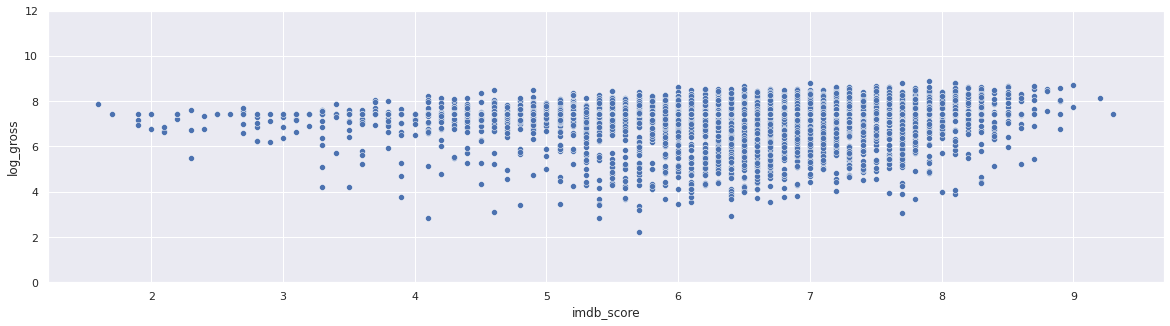

In [63]:
df['log_gross'] = np.log10(df['gross'])

sns.scatterplot(data=df, x="imdb_score", y="log_gross")
plt.ylim(0, 12)
plt.show()

###Log Profit vs IMDB Score

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


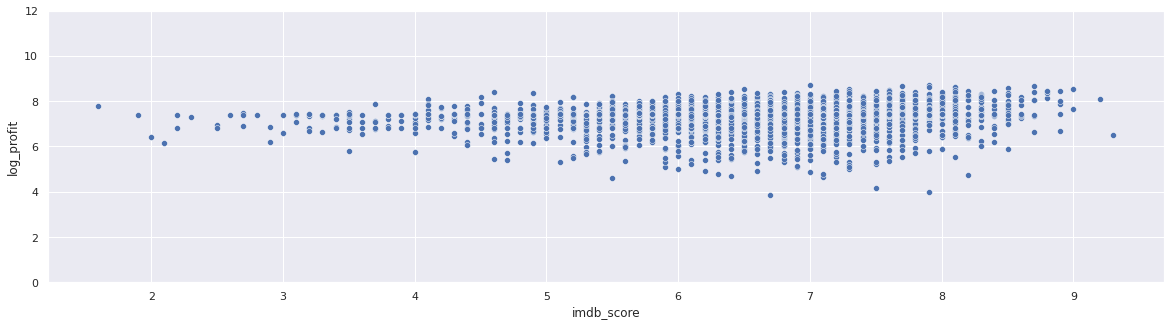

In [64]:
df['log_profit'] = np.log10(df['gross']-df['budget'])

sns.scatterplot(data=df, x="imdb_score", y="log_profit")
plt.ylim(0, 12)
plt.show()

###Profit Percentage vs IMDB Score

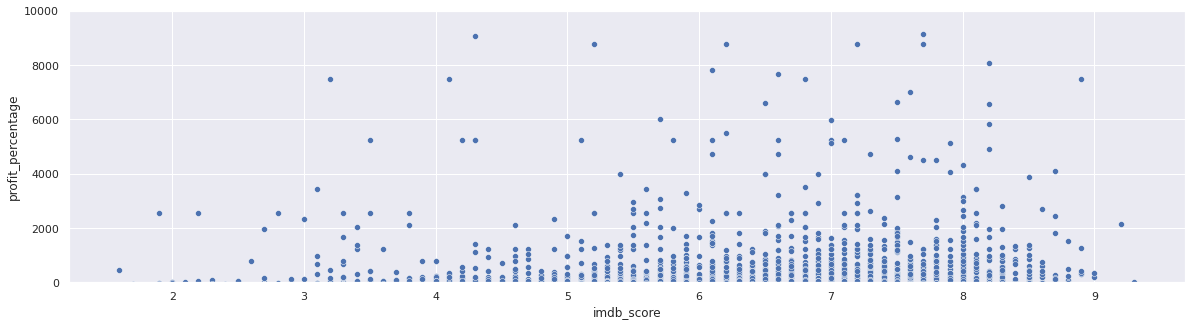

In [75]:
df['profit_percentage'] = ((df['gross']-df['budget'])/df['budget'])*100

sns.scatterplot(data=df, x="imdb_score", y="profit_percentage")
plt.ylim(0, 10000)
plt.show()

###Movie Facebook Likes vs IMDB Score

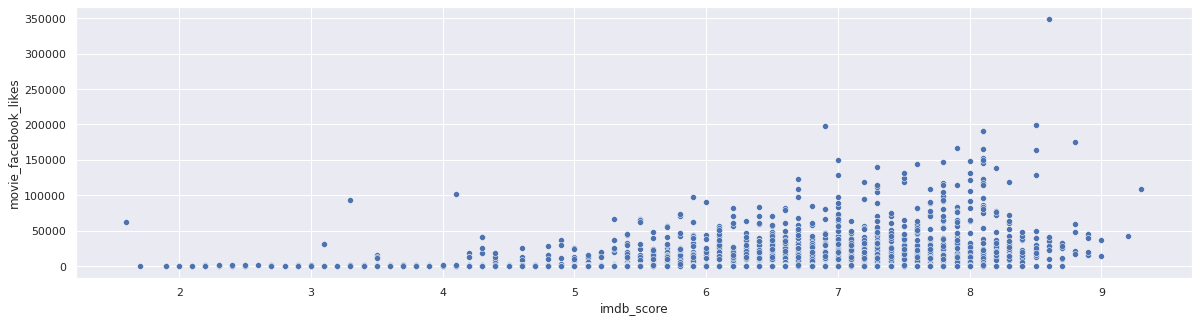

In [77]:
sns.scatterplot(data=df, x="imdb_score", y="movie_facebook_likes")

###Top 20 Actors by IMDB Score

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


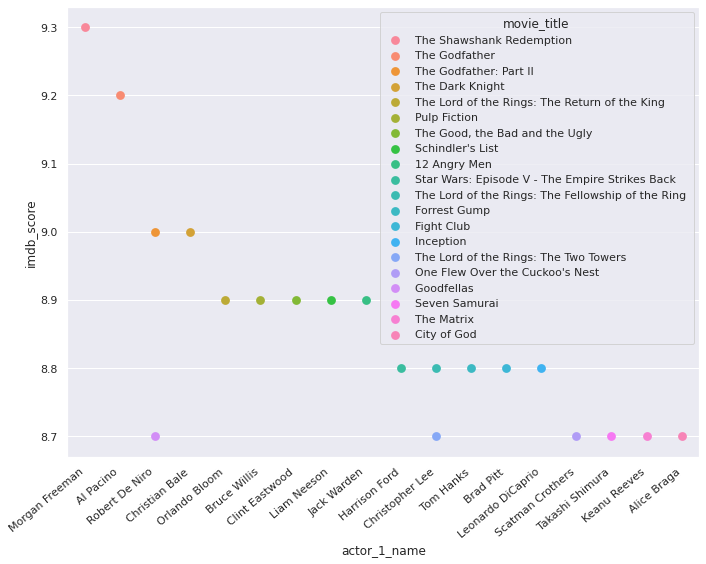

In [82]:
plt.figure(figsize=(10,8))

df= df.sort_values(by ='imdb_score' , ascending=False)
df_new=df.head(20)
ax=sns.pointplot(df_new['actor_1_name'], df_new['imdb_score'], hue=df_new['movie_title'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

###Top 20 Directors by IMDB Score

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


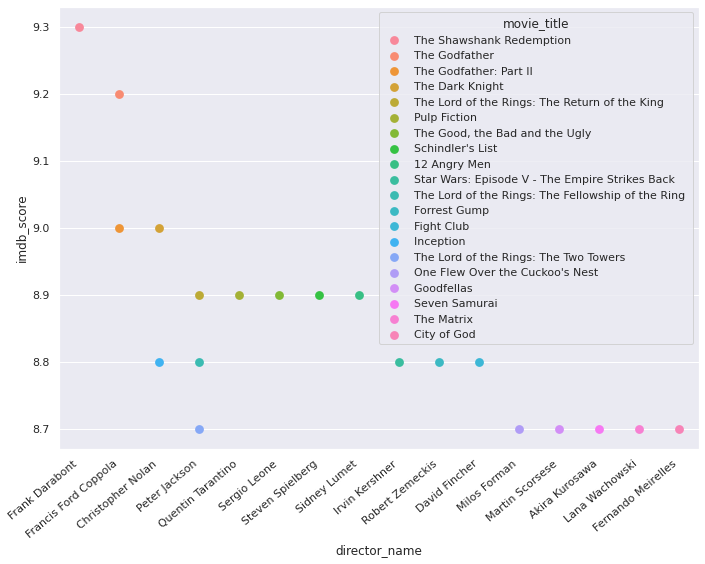

In [83]:
plt.figure(figsize=(10,8))

ax=sns.pointplot(df_new['director_name'], df_new['imdb_score'], hue=df_new['movie_title'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()